# Algorithmic Trading Backtest: Moving Average Crossover
Goal: Implement and backtest a simple MA crossover strategy with position sizing and basic performance metrics.


In [24]:
!pip install yfinance --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use('default')


In [25]:
# Real data option:
# symbol = 'AAPL'
# prices = yf.download(symbol, start='2018-01-01', end='2024-01-01')['Adj Close'].dropna()

# Synthetic fallback:
np.random.seed(1)
dates = pd.date_range('2020-01-01', periods=1000)
prices = pd.Series(100 + np.cumsum(np.random.normal(0,1,len(dates))), index=dates, name='Price')

prices.tail()


,Price
2022-09-22,140.992483
2022-09-23,138.715185
2022-09-24,138.645561
2022-09-25,138.999431
2022-09-26,138.812476


In [26]:
short_window = 20
long_window = 50

df = pd.DataFrame(prices).rename(columns={0:'Price'} if isinstance(prices, pd.DataFrame) else {'Price':'Price'})
df['Price'] = prices
df['SMA_short'] = df['Price'].rolling(short_window).mean()
df['SMA_long'] = df['Price'].rolling(long_window).mean()
df['signal'] = 0
df.loc[df['SMA_short'] > df['SMA_long'], 'signal'] = 1
df['position'] = df['signal'].diff().fillna(0)
df[['Price','SMA_short','SMA_long']].tail()


,Price,SMA_short,SMA_long
2022-09-22,140.992483,139.251896,142.374108
2022-09-23,138.715185,139.216933,142.282226
2022-09-24,138.645561,139.199811,142.176132
2022-09-25,138.999431,139.180693,142.052717
2022-09-26,138.812476,139.163634,141.948240


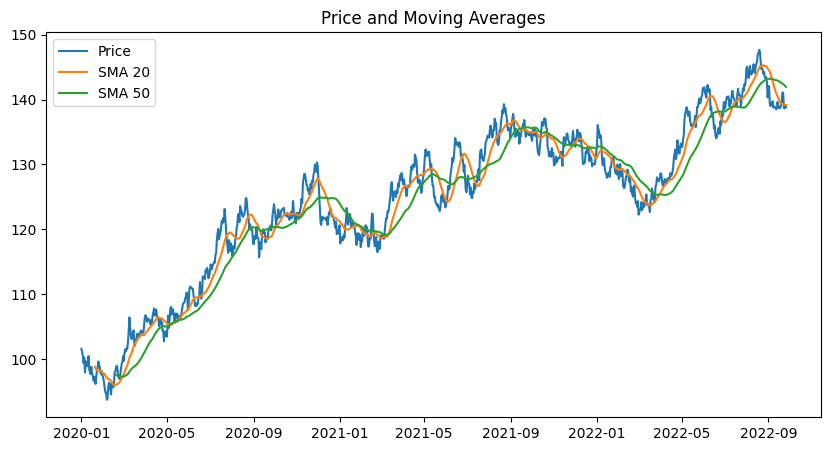

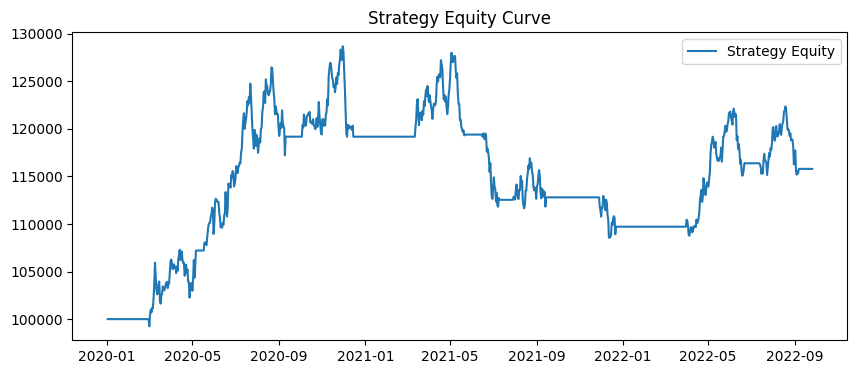

In [27]:
initial_capital = 100000
shares = 0
cash = initial_capital
positions = []

df['returns'] = df['Price'].pct_change().fillna(0)
df['strategy_returns'] = df['returns'] * df['signal'].shift(1)  # invest when signal=1

df['cum_strategy'] = (1 + df['strategy_returns']).cumprod() * initial_capital

plt.figure(figsize=(10,5))
plt.plot(df['Price'], label='Price')
plt.plot(df['SMA_short'], label=f'SMA {short_window}')
plt.plot(df['SMA_long'], label=f'SMA {long_window}')
plt.legend()
plt.title('Price and Moving Averages')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(df['cum_strategy'], label='Strategy Equity')
plt.title('Strategy Equity Curve')
plt.legend()
plt.show()


### Extensions
- Use transaction costs and slippage.
- Use position sizing by volatility (e.g., risk 1% of capital).
- Add stop-loss and take-profit rules.
